# Analysis of Scenario 1: Restart after shutdown with kill signals (SIGTERM/SIGKILL)

## Imports

In [1]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import scikit_posthocs as sp
import numpy as np


# Analysis of individual gateways

In [2]:
def analyze(gateway_name: str):
    # Load results for gateways
    df = pd.read_csv(f"../results/measurements_{gateway_name}.csv")

    print(f"Analysis for {gateway_name.upper()}")
    print("Data preview:")
    display(df.head())

    # Summary statistics
    summary = (
        df.groupby("signal")[["downtime_ms"]]
        .agg(["mean", "std", "median", "min", "max", "count"])
    )
    display(summary)

    # Downtime over iterations
    print("Downtime over iterations:")
    plt.figure(figsize=(9, 5))
    for sig, group in df.groupby("signal"):
        plt.plot(group["iteration"], group["downtime_ms"],
                 "x--", label=f"{sig}")
    # plt.title(gateway_name + ": Gateway Restart Downtime per Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Downtime (ms)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Boxplots for comparison of signals
    print("Downtime distribution by signal:")
    fig, axes = plt.subplots(1, 1, figsize=(6, 5), sharey=True)
    df.boxplot(column="downtime_ms", by="signal", ax=axes)
    plt.xlabel("Signal")
    plt.ylabel("Downtime (ms)")
    axes.set_title("")
    plt.suptitle("")
    plt.show()

## NGINX

Analysis for NGINX
Data preview:


,iteration,gateway,signal,down_ts_ms,up_ts_ms,downtime_ms
0,1,nginx,SIGTERM,1764174407256,1764174407513,257
1,2,nginx,SIGTERM,1764174409582,1764174409840,258
2,3,nginx,SIGTERM,1764174411907,1764174412192,285
3,4,nginx,SIGTERM,1764174414277,1764174414523,246
4,5,nginx,SIGTERM,1764174416600,1764174416837,237


downtime_ms                                  
               mean        std median  min  max count
signal                                               
SIGKILL      134.19  15.493690  133.5  108  213   100
SIGTERM      253.52  17.413846  252.0  219  307   100

Downtime over iterations:


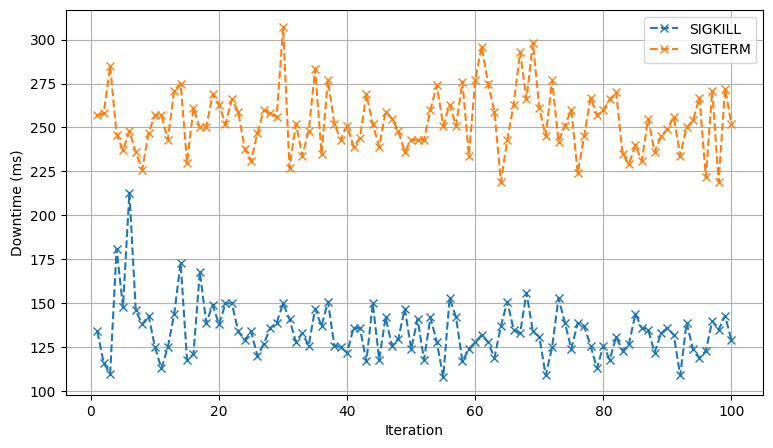

Downtime distribution by signal:


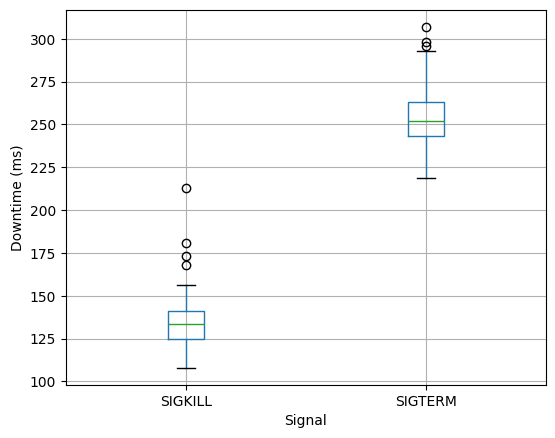

In [3]:
analyze("nginx")

## Caddy

Analysis for CADDY
Data preview:


,iteration,gateway,signal,down_ts_ms,up_ts_ms,downtime_ms
0,1,caddy,SIGTERM,1764005456540,1764005456802,262
1,2,caddy,SIGTERM,1764005458876,1764005459200,324
2,3,caddy,SIGTERM,1764005461239,1764005461552,313
3,4,caddy,SIGTERM,1764005463606,1764005463891,285
4,5,caddy,SIGTERM,1764005465945,1764005466263,318


downtime_ms                                  
               mean        std median  min  max count
signal                                               
SIGKILL      192.60  14.731263  191.0  165  251   100
SIGTERM      303.94  17.469061  302.5  262  367   100

Downtime over iterations:


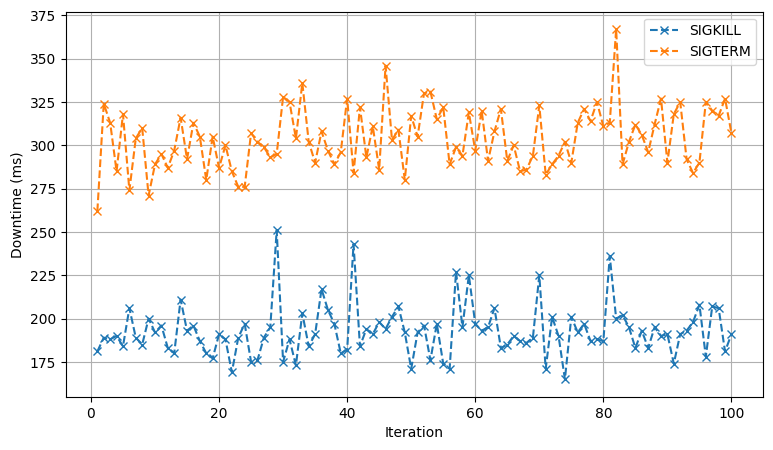

Downtime distribution by signal:


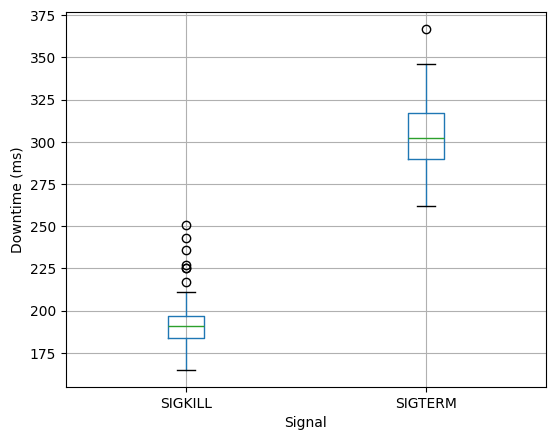

In [4]:
analyze("caddy")

## HAProxy

Analysis for HAPROXY
Data preview:


,iteration,gateway,signal,down_ts_ms,up_ts_ms,downtime_ms
0,1,haproxy,SIGTERM,1764005942638,1764005942909,271
1,2,haproxy,SIGTERM,1764005944966,1764005945276,310
2,3,haproxy,SIGTERM,1764005947335,1764005947656,321
3,4,haproxy,SIGTERM,1764005949717,1764005950030,313
4,5,haproxy,SIGTERM,1764005952076,1764005952435,359


downtime_ms                                  
               mean        std median  min  max count
signal                                               
SIGKILL      192.86  10.754393  193.0  162  225   100
SIGTERM      302.79  19.661425  301.0  260  359   100

Downtime over iterations:


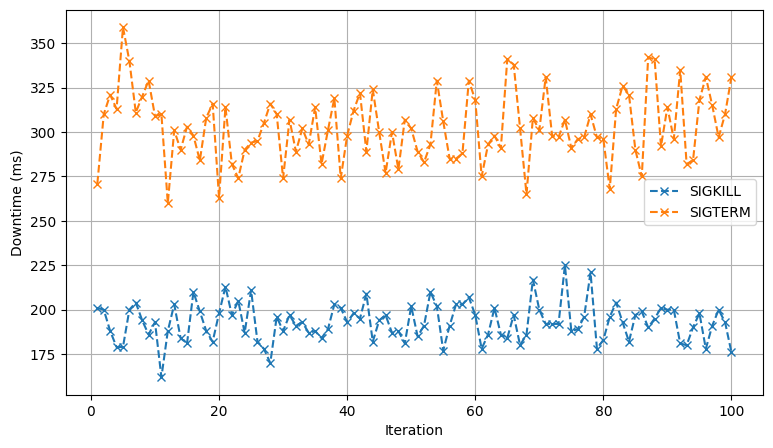

Downtime distribution by signal:


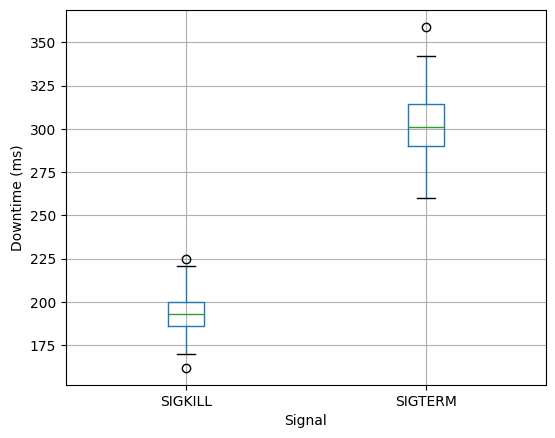

In [5]:
analyze("haproxy")

## Traefik

Analysis for TRAEFIK
Data preview:


,iteration,gateway,signal,down_ts_ms,up_ts_ms,downtime_ms
0,1,traefik,SIGTERM,1764006426435,1764006426918,483
1,2,traefik,SIGTERM,1764006428962,1764006429598,636
2,3,traefik,SIGTERM,1764006431639,1764006432276,637
3,4,traefik,SIGTERM,1764006434333,1764006434823,490
4,5,traefik,SIGTERM,1764006436873,1764006437440,567


downtime_ms                                    
               mean         std median  min   max count
signal                                                 
SIGKILL      468.13  147.679673  426.5  237   978   100
SIGTERM      581.81  143.328238  565.0  328  1022   100

Downtime over iterations:


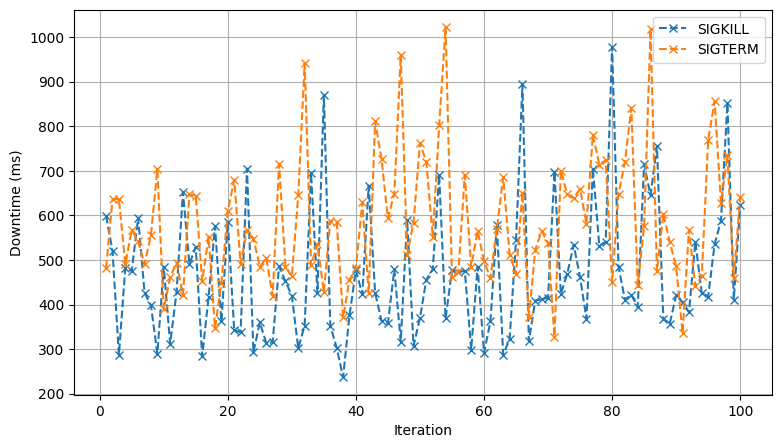

Downtime distribution by signal:


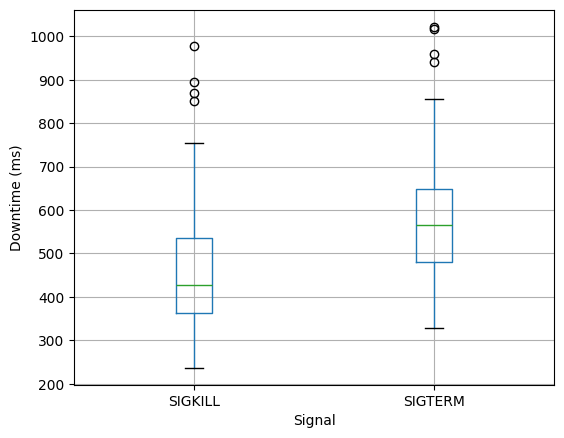

In [6]:
analyze("traefik")

## Tyk

Analysis for TYK
Data preview:


,iteration,gateway,signal,down_ts_ms,up_ts_ms,downtime_ms
0,1,tyk,SIGTERM,1764007288657,1764007290026,1369
1,2,tyk,SIGTERM,1764007292087,1764007293495,1408
2,3,tyk,SIGTERM,1764007295537,1764007296926,1389
3,4,tyk,SIGTERM,1764007298970,1764007300352,1382
4,5,tyk,SIGTERM,1764007302392,1764007303790,1398


downtime_ms                                     
               mean        std  median   min   max count
signal                                                  
SIGKILL      251.71  17.828756   250.0   221   324   100
SIGTERM     1381.00  19.947912  1382.0  1342  1426   100

Downtime over iterations:


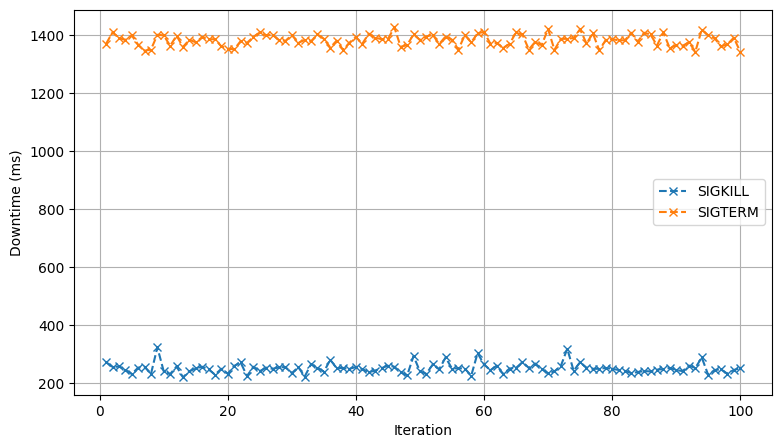

Downtime distribution by signal:


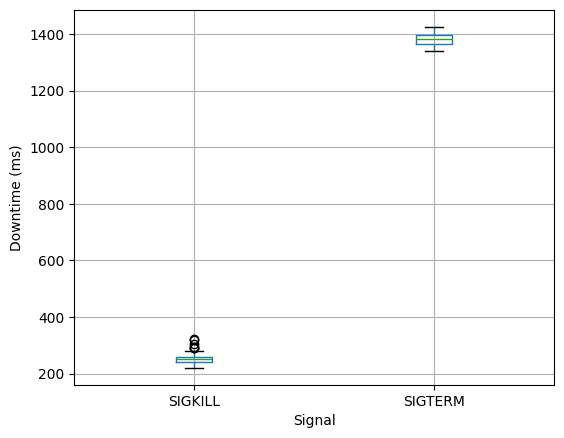

In [7]:
analyze("tyk")

# Comparison across all gateways

In [8]:
# Unified gateway color map
GATEWAY_COLORS = {
    "caddy": "red",
    "haproxy": "green",
    "traefik": "blue",
    "tyk": "orange",
    "nginx": "purple",
}

In [9]:
# Load results for gateways
gateways = ["nginx", "caddy", "haproxy", "traefik", "tyk"]
dfs = []
for gateway_name in gateways:
    path = f"../results/measurements_{gateway_name}.csv"
    df = pd.read_csv(path)
    df["gateway"] = gateway_name
    dfs.append(df)

all_data = pd.concat(dfs, ignore_index=True)

## Restart downtime per iteration (SIGKILL)

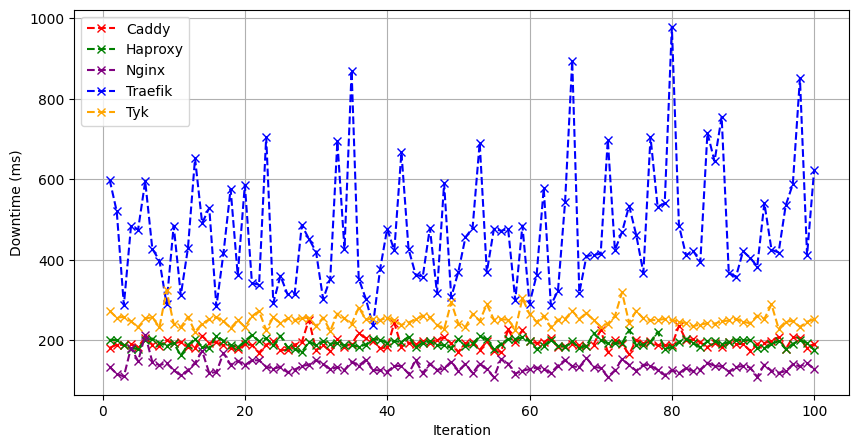

In [10]:
data_sigkill = all_data[all_data["signal"] == "SIGKILL"]
gateways = sorted(data_sigkill["gateway"].unique())

plt.figure(figsize=(10, 5))
for g in gateways:
    group = data_sigkill[data_sigkill["gateway"] == g]
    plt.plot(group["iteration"], group["downtime_ms"],
             "x--", label=g.capitalize(), color=GATEWAY_COLORS.get(g, "lightgray"))
plt.title("")
# plt.title("Restart downtime per iteration (SIGKILL)")
plt.xlabel("Iteration")
plt.ylabel("Downtime (ms)")
plt.legend()
plt.grid(True)
plt.savefig("findings-scenario-1-sigkill-over-iterations.png", dpi=300)
plt.show()

## Restart downtime per iteration (SIGTERM)

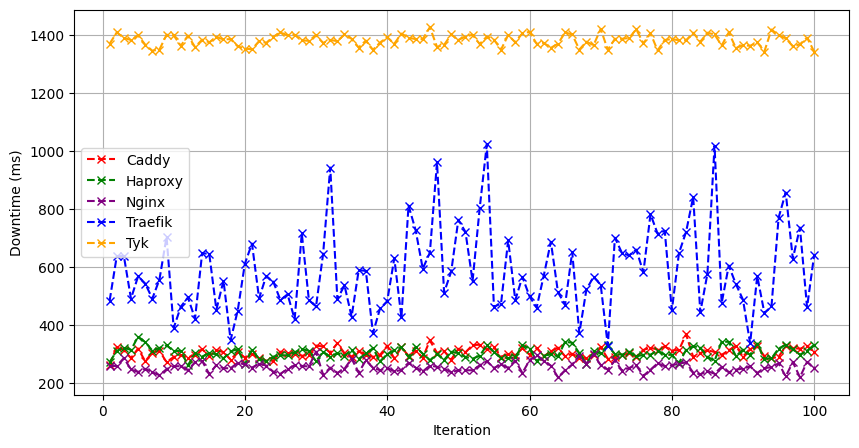

In [11]:
data_sigterm = all_data[all_data["signal"] == "SIGTERM"]
gateways = sorted(data_sigterm["gateway"].unique())

plt.figure(figsize=(10, 5))
for g in gateways:
    group = data_sigterm[data_sigterm["gateway"] == g]
    plt.plot(group["iteration"], group["downtime_ms"],
             "x--", label=g.capitalize(), color=GATEWAY_COLORS.get(g, "lightgray"))
# plt.title("Restart downtime per iteration (SIGTERM)")
plt.title("")
plt.xlabel("Iteration")
plt.ylabel("Downtime (ms)")
plt.legend()
plt.grid(True)
plt.savefig("findings-scenario-1-sigterm-over-iterations.png", dpi=300)
plt.show()

## Restart downtime comparison across gateways (SIGKILL)

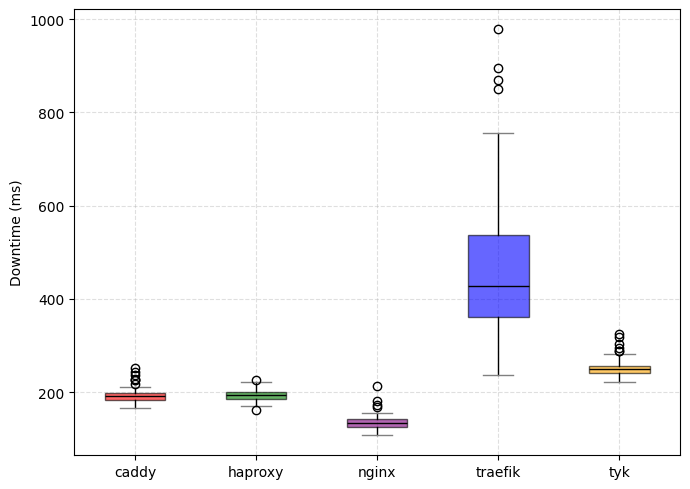

In [12]:
data_sigkill = all_data[all_data["signal"] == "SIGKILL"]
gateways = sorted(data_sigkill["gateway"].unique())
data_per_gateway = [data_sigkill[data_sigkill["gateway"]
                                 == gw]["downtime_ms"] for gw in gateways]

fig, ax = plt.subplots(figsize=(7, 5))
bp = ax.boxplot(
    data_per_gateway,
    tick_labels=[gw for gw in gateways],
    patch_artist=True,
    medianprops=dict(color="black"),
    capprops=dict(color="gray"),
)

for patch, gw in zip(bp["boxes"], gateways):
    patch.set_facecolor(GATEWAY_COLORS.get(gw, "lightgray"))
    patch.set_alpha(0.6)

ax.set_ylabel("Downtime (ms)")
ax.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig("findings-scenario-1-sigkill.png", dpi=300)
plt.show()

## Restart downtime comparison across gateways (SIGTERM)

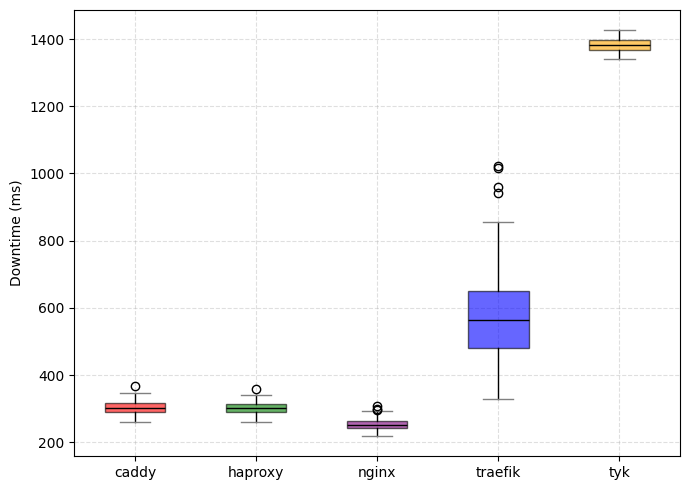

In [13]:
data_sigterm = all_data[all_data["signal"] == "SIGTERM"]
gateways = sorted(data_sigterm["gateway"].unique())
data_per_gateway = [data_sigterm[data_sigterm["gateway"]
                                 == gw]["downtime_ms"] for gw in gateways]

fig, ax = plt.subplots(figsize=(7, 5))
bp = ax.boxplot(
    data_per_gateway,
    tick_labels=gateways,
    patch_artist=True,
    medianprops=dict(color="black"),
    capprops=dict(color="gray"),
)

for patch, gw in zip(bp["boxes"], gateways):
    patch.set_facecolor(GATEWAY_COLORS.get(gw, "lightgray"))
    patch.set_alpha(0.6)

ax.set_ylabel("Downtime (ms)")
ax.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig("findings-scenario-1-sigterm.png", dpi=300)
plt.show()

# Summarized data

In [14]:
# Combined summary table for all gateways
summary_all = (
    all_data.groupby(["gateway", "signal"])["downtime_ms"]
    .agg(["mean", "std", "median", "min", "max", "count"])
    .reset_index()
)

print("Combined summary table (all gateways)")
display(summary_all.round(2))

# Export to CSV for LaTeX table
summary_all.round(2).to_csv("../results/summary_all_gateways.csv", index=False)

Combined summary table (all gateways)


,gateway,signal,mean,std,median,min,max,count
0,caddy,SIGKILL,192.60,14.73,191.0,165,251,100
1,caddy,SIGTERM,303.94,17.47,302.5,262,367,100
2,haproxy,SIGKILL,192.86,10.75,193.0,162,225,100
3,haproxy,SIGTERM,302.79,19.66,301.0,260,359,100
4,nginx,SIGKILL,134.19,15.49,133.5,108,213,100
5,nginx,SIGTERM,253.52,17.41,252.0,219,307,100
6,traefik,SIGKILL,468.13,147.68,426.5,237,978,100
7,traefik,SIGTERM,581.81,143.33,565.0,328,1022,100
8,tyk,SIGKILL,251.71,17.83,250.0,221,324,100
9,tyk,SIGTERM,1381.00,19.95,1382.0,1342,1426,100


# Student's t-test

In [15]:

for signal in all_data["signal"].unique():
    print(f"T-test analysis for {signal.upper()}\n")

    data_signal = all_data[all_data["signal"] == signal]
    data_per_gateway = [
        data_signal[data_signal["gateway"] == gw]["downtime_ms"] for gw in gateways
    ]
    ttest_results = sp.posthoc_ttest(
        data_signal,
        val_col="downtime_ms",
        group_col="gateway",
        equal_var=False,
        sort=True
    )

    print("T-test p-values matrix")
    
    print("actual values:")
    display(ttest_results)
    print("rounded values:")
    display(ttest_results.round(3))
    print("significant differences matrix (p < 0.05):")
    display(ttest_results < 0.05)

    # check for significant differences
    print("Significant differences (p < 0.05):")
    for a, b in itertools.combinations(gateways, 2):
        p = ttest_results.loc[a, b]
        if p < 0.05:
            print(f"{a} vs {b}: p={p:.100f}")
    print("\n\n")

T-test analysis for SIGTERM

T-test p-values matrix
actual values:


,caddy,haproxy,nginx,traefik,tyk
caddy,1.000000e+00,6.624156e-01,1.119556e-50,1.020983e-35,5.814457e-287
haproxy,6.624156e-01,1.000000e+00,1.477208e-45,6.370681e-36,1.604443e-286
nginx,1.119556e-50,1.477208e-45,1.000000e+00,1.032449e-41,9.718907e-291
traefik,1.020983e-35,6.370681e-36,1.032449e-41,1.000000e+00,2.931183e-78
tyk,5.814457e-287,1.604443e-286,9.718907e-291,2.931183e-78,1.000000e+00


rounded values:


,caddy,haproxy,nginx,traefik,tyk
caddy,1.000,0.662,0.0,0.0,0.0
haproxy,0.662,1.000,0.0,0.0,0.0
nginx,0.000,0.000,1.0,0.0,0.0
traefik,0.000,0.000,0.0,1.0,0.0
tyk,0.000,0.000,0.0,0.0,1.0


significant differences matrix (p < 0.05):


,caddy,haproxy,nginx,traefik,tyk
caddy,False,False,True,True,True
haproxy,False,False,True,True,True
nginx,True,True,False,True,True
traefik,True,True,True,False,True
tyk,True,True,True,True,False


Significant differences (p < 0.05):
caddy vs nginx: p=0.0000000000000000000000000000000000000000000000000111955557184267885252709747877451929980105307903593
caddy vs traefik: p=0.0000000000000000000000000000000000102098312935192656894931501982624816920100886951391888683940984010
caddy vs tyk: p=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
haproxy vs nginx: p=0.0000000000000000000000000000000000000000000014772075457962445319276821119102939519847484890143662038
haproxy vs traefik: p=0.0000000000000000000000000000000000063706810192773028372094222582779264927220052584841923047695215268
haproxy vs tyk: p=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
nginx vs traefik: p=0.0000000000000000000000000000000000000000103244872438982446070418137714786954752253250392013010147791
nginx vs tyk: p=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

,caddy,haproxy,nginx,traefik,tyk
caddy,1.000000e+00,8.868037e-01,5.196246e-69,2.519429e-34,1.399203e-63
haproxy,8.868037e-01,1.000000e+00,1.562794e-73,3.158337e-34,1.208202e-64
nginx,5.196246e-69,1.562794e-73,1.000000e+00,3.765284e-41,1.760777e-112
traefik,2.519429e-34,3.158337e-34,3.765284e-41,1.000000e+00,1.286730e-26
tyk,1.399203e-63,1.208202e-64,1.760777e-112,1.286730e-26,1.000000e+00


rounded values:


,caddy,haproxy,nginx,traefik,tyk
caddy,1.000,0.887,0.0,0.0,0.0
haproxy,0.887,1.000,0.0,0.0,0.0
nginx,0.000,0.000,1.0,0.0,0.0
traefik,0.000,0.000,0.0,1.0,0.0
tyk,0.000,0.000,0.0,0.0,1.0


significant differences matrix (p < 0.05):


,caddy,haproxy,nginx,traefik,tyk
caddy,False,False,True,True,True
haproxy,False,False,True,True,True
nginx,True,True,False,True,True
traefik,True,True,True,False,True
tyk,True,True,True,True,False


Significant differences (p < 0.05):
caddy vs nginx: p=0.0000000000000000000000000000000000000000000000000000000000000000000051962459743676434099903205651656
caddy vs traefik: p=0.0000000000000000000000000000000002519428947703304374744355979398344382765942367828988422382023465344
caddy vs tyk: p=0.0000000000000000000000000000000000000000000000000000000000000013992033321282119916270751828020445286
haproxy vs nginx: p=0.0000000000000000000000000000000000000000000000000000000000000000000000001562793893786458834158136823
haproxy vs traefik: p=0.0000000000000000000000000000000003158337079886746762908053469972476758152294930855488819897797025258
haproxy vs tyk: p=0.0000000000000000000000000000000000000000000000000000000000000001208201632190993218458428716044655532
nginx vs traefik: p=0.0000000000000000000000000000000000000000376528376495867929368636891801420653783513224194211282264893
nginx vs tyk: p=0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

# Compare Restart Time of Tyk with and without Redis

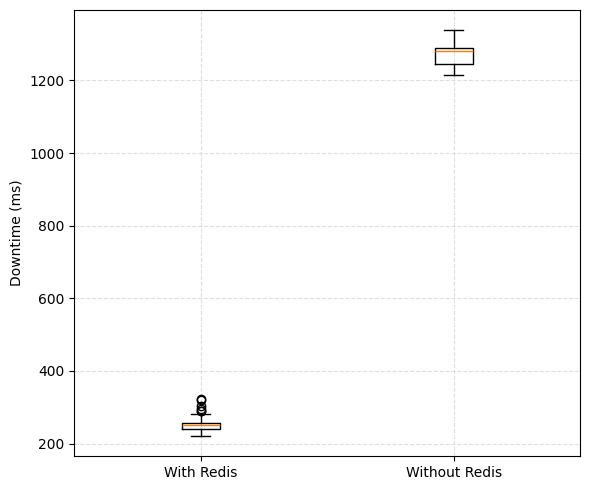

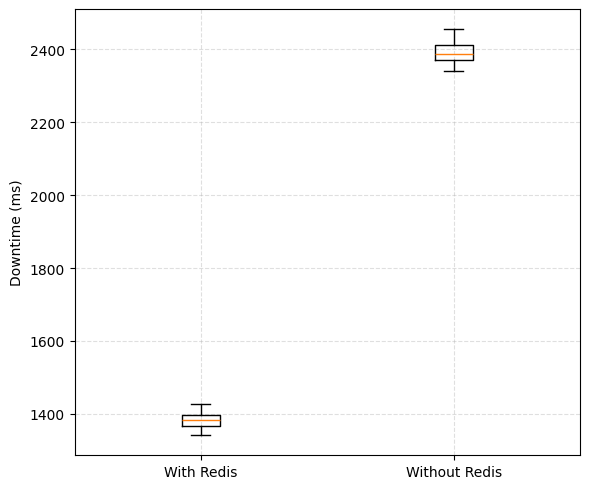

In [16]:
df_with_redis = pd.read_csv("../results/measurements_tyk.csv")
df_without_redis = pd.read_csv("../results/measurements_tyk_without_redis.csv")

for signal in ["SIGKILL", "SIGTERM"]:
    data_with_redis = df_with_redis[df_with_redis["signal"] == signal]["downtime_ms"]
    data_without_redis = df_without_redis[df_without_redis["signal"] == signal]["downtime_ms"]

    fig, ax = plt.subplots(figsize=(6, 5))
    bp = ax.boxplot(
        [data_with_redis, data_without_redis],
        tick_labels=["With Redis", "Without Redis"],
    )

    ax.set_ylabel("Downtime (ms)")
    # ax.set_title(f"Tyk Downtime with and without Redis ({signal})")
    ax.grid(True, linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.savefig(f"findings-tyk-{signal.lower()}-with-without-redis.png", dpi=300)
    plt.show()